In [207]:
import pandas as pd 

In [208]:
train_df = pd.read_csv("C:\\Users\\parim\\Downloads\\predict-energy-behavior-of-prosumers\\train.csv", parse_dates=["datetime"])
weather_station_to_county_mapping_df = pd.read_csv("C:\\Users\\parim\\Downloads\\predict-energy-behavior-of-prosumers\\weather_station_to_county_mapping.csv")
historical_weather_df = pd.read_csv("C:\\Users\\parim\\Downloads\\predict-energy-behavior-of-prosumers\\historical_weather.csv", parse_dates=["datetime"])
forecast_weather_df = pd.read_csv("C:\\Users\\parim\\Downloads\\predict-energy-behavior-of-prosumers\\forecast_weather.csv", parse_dates=["origin_datetime"])
gas_prices_df = pd.read_csv("C:\\Users\\parim\\Downloads\\predict-energy-behavior-of-prosumers\\gas_prices.csv", parse_dates=["forecast_date", "origin_date"])
electricity_prices_df = pd.read_csv("C:\\Users\\parim\\Downloads\\predict-energy-behavior-of-prosumers\\electricity_prices.csv", parse_dates=["forecast_date", "origin_date"])
client_df = pd.read_csv("C:\\Users\\parim\\Downloads\\predict-energy-behavior-of-prosumers\\client.csv", parse_dates=["date"])


In [209]:
print(f"train df shape :{train_df.shape} \n \
      weather station to country mapping: {weather_station_to_county_mapping_df.shape} \n \
        historical weather: {historical_weather_df.shape}\n \
        forecast weather: {forecast_weather_df.shape} \n \
        gas prices : {gas_prices_df.shape} \n \
        electricity prices: {electricity_prices_df.shape} \n \
        client list: {client_df.shape}"
        )

train df shape :(2018352, 9) 
       weather station to country mapping: (112, 4) 
         historical weather: (1710802, 18)
         forecast weather: (3424512, 18) 
         gas prices : (637, 5) 
         electricity prices: (15286, 4) 
         client list: (41919, 7)


In [210]:
electricity_prices_df.columns

Index(['forecast_date', 'euros_per_mwh', 'origin_date', 'data_block_id'], dtype='object')

In [211]:
print(f"train df cols :{train_df.columns} \n\n \
      weather station to country mapping cols: {weather_station_to_county_mapping_df.columns} \n \n\
        historical weather cols: {historical_weather_df.columns}\n\n \
        forecast weather cols: {forecast_weather_df.columns} \n\n \
        gas prices cols: {gas_prices_df.columns} \n\n \
        electricity prices cols: {electricity_prices_df.columns} \n\n \
        client list cols: {client_df.columns}"
        )



train df cols :Index(['county', 'is_business', 'product_type', 'target', 'is_consumption',
       'datetime', 'data_block_id', 'row_id', 'prediction_unit_id'],
      dtype='object') 

       weather station to country mapping cols: Index(['county_name', 'longitude', 'latitude', 'county'], dtype='object') 
 
        historical weather cols: Index(['datetime', 'temperature', 'dewpoint', 'rain', 'snowfall',
       'surface_pressure', 'cloudcover_total', 'cloudcover_low',
       'cloudcover_mid', 'cloudcover_high', 'windspeed_10m',
       'winddirection_10m', 'shortwave_radiation', 'direct_solar_radiation',
       'diffuse_radiation', 'latitude', 'longitude', 'data_block_id'],
      dtype='object')

         forecast weather cols: Index(['latitude', 'longitude', 'origin_datetime', 'hours_ahead',
       'temperature', 'dewpoint', 'cloudcover_high', 'cloudcover_low',
       'cloudcover_mid', 'cloudcover_total', '10_metre_u_wind_component',
       '10_metre_v_wind_component', 'data_block_id',

In [212]:
train_df['datetime'][0]

Timestamp('2021-09-01 00:00:00')

In [213]:
print(f"train df cols :{train_df['datetime'][2]} \n\n \
        historical weather cols: {historical_weather_df['datetime'][0]}\n\n \
        client list cols: {client_df['date'][0]}"
        )

train df cols :2021-09-01 00:00:00 

         historical weather cols: 2021-09-01 00:00:00

         client list cols: 2021-09-01 00:00:00


In [214]:
train_df['county'].unique(), weather_station_to_county_mapping_df['county'].unique()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       dtype=int64),
 array([nan, 10.,  1.,  7.,  6.,  9.,  0., 14.,  3., 13., 11.,  4.,  5.,
        15.,  8.,  2.]))

In [215]:
train_df.isna().sum()

county                  0
is_business             0
product_type            0
target                528
is_consumption          0
datetime                0
data_block_id           0
row_id                  0
prediction_unit_id      0
dtype: int64

In [216]:
weather_station_to_county_mapping_df.isna().sum()

county_name    63
longitude       0
latitude        0
county         63
dtype: int64

In [217]:
forecast_weather_df.isna().sum()

latitude                             0
longitude                            0
origin_datetime                      0
hours_ahead                          0
temperature                          0
dewpoint                             0
cloudcover_high                      0
cloudcover_low                       0
cloudcover_mid                       0
cloudcover_total                     0
10_metre_u_wind_component            0
10_metre_v_wind_component            0
data_block_id                        0
forecast_datetime                    0
direct_solar_radiation               0
surface_solar_radiation_downwards    2
snowfall                             0
total_precipitation                  0
dtype: int64

"train_df" with "target" field having 528 null values, "weather station to county mapping df" with "county_name & county" fields having 63 null values, 
"forecast_weather_df" with "surface_solar_radiation_downwards" field having 2 null values

In [218]:
forecast_weather_df.dropna(inplace=True)

In [219]:
weather_station_to_county_mapping_df[weather_station_to_county_mapping_df['county'].isna()]

,county_name,longitude,latitude,county
0,NaN,21.7,57.6,NaN
1,NaN,21.7,57.9,NaN
2,NaN,21.7,58.2,NaN
3,NaN,21.7,58.5,NaN
4,NaN,21.7,58.8,NaN
...,...,...,...,...
107,NaN,28.2,58.5,NaN
108,NaN,28.2,58.8,NaN
109,NaN,28.2,59.1,NaN
110,NaN,28.2,59.4,NaN


In [220]:
county_name = weather_station_to_county_mapping_df['county_name'].mode()[0]
weather_station_to_county_mapping_df[weather_station_to_county_mapping_df['county_name'] ==county_name]

,county_name,longitude,latitude,county
45,Harjumaa,24.2,59.1,0.0
46,Harjumaa,24.2,59.4,0.0
54,Harjumaa,24.7,59.4,0.0
61,Harjumaa,25.2,59.1,0.0
62,Harjumaa,25.2,59.4,0.0
70,Harjumaa,25.7,59.4,0.0


In [221]:
weather_station_to_county_mapping_df['county_name'] = weather_station_to_county_mapping_df['county_name'].fillna('Harjumaa')
weather_station_to_county_mapping_df['county'] = weather_station_to_county_mapping_df['county'].fillna(0.0)

<Axes: >

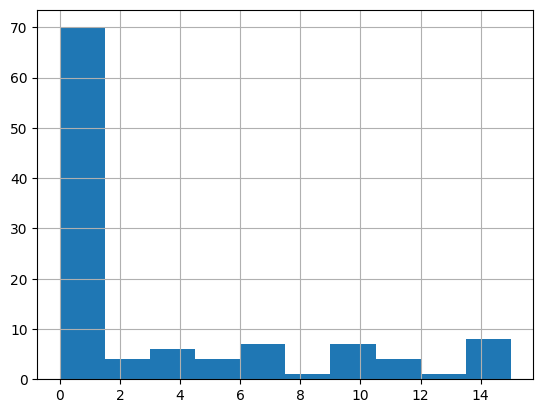

In [232]:
weather_station_to_county_mapping_df['county'].hist()

In [239]:
train_df['county'].info()

<class 'pandas.core.series.Series'>
Index: 2017824 entries, 0 to 2018351
Series name: county
Non-Null Count    Dtype
--------------    -----
2017824 non-null  int64
dtypes: int64(1)
memory usage: 30.8 MB


In [236]:
weather_station_to_county_mapping_df['county'] = weather_station_to_county_mapping_df['county'].astype('Int64')
weather_station_to_county_mapping_df.isna().sum()

county_name    0
longitude      0
latitude       0
county         0
dtype: int64

In [223]:
train_df[train_df['target'].isna()].head()

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
178938,0,0,1,NaN,0,2021-10-31 03:00:00,60,178938,0
178939,0,0,1,NaN,1,2021-10-31 03:00:00,60,178939,0
178940,0,0,2,NaN,0,2021-10-31 03:00:00,60,178940,1
178941,0,0,2,NaN,1,2021-10-31 03:00:00,60,178941,1
178942,0,0,3,NaN,0,2021-10-31 03:00:00,60,178942,2


In [224]:
train_df[train_df['target']==0.000].head(2)

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
2,0,0,2,0.0,0,2021-09-01,0,2,1
6,0,1,0,0.0,0,2021-09-01,0,6,3


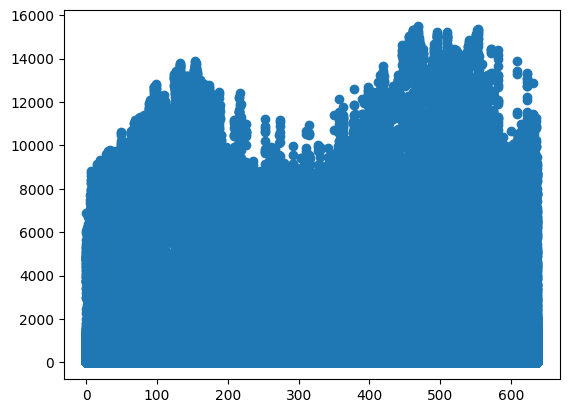

In [225]:
import matplotlib.pyplot as plt
plt.scatter(train_df['data_block_id'], train_df['target'])

In [226]:
block_list = train_df[train_df['target'].isna()]['data_block_id'].unique()#, datetime '']
block_list

array([ 60, 207, 424, 571], dtype=int64)

In [227]:
train_df[train_df['data_block_id']==424]['target'].value_counts()#unique()#, datetime '']
# 60 --> 0.0, 207 --> 0.0, 424 --> 0.0, 571 --> 0.0 

target
0.000      533
0.003       19
0.001       15
1.100        9
0.005        9
          ... 
10.101       1
113.980      1
11.421       1
447.148      1
296.115      1
Name: count, Length: 2439, dtype: int64

In [235]:
train_df = train_df.dropna()
train_df.isna().sum()
train_df.head(2)

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01,0,0,0
1,0,0,1,96.590,1,2021-09-01,0,1,0


In [228]:
#train_df[train_df['data_block_id']==60].value_counts()
# block_num_cond = train_df[train_df['data_block_id']==60]['target']
# median_value = block_num_cond.median()
# median_value

In [229]:
# def fill_target(df, block_ids):
#     for i in block_ids:
#         block_num_cond = df[df['data_block_id']==i]['target']
#         median_value = block_num_cond.median()
#         df.loc['target'] = df.loc[df['data_block_id'==i], 'target'].fillna(median_value)
#     return df
# train_df = fill_target(train_df,block_list)  


In [230]:
train_df.isna().sum()

county                  0
is_business             0
product_type            0
target                528
is_consumption          0
datetime                0
data_block_id           0
row_id                  0
prediction_unit_id      0
dtype: int64

In [231]:
train_df.head(1)

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01,0,0,0


Merging train_df & weather station to county mapping dataset based on common column 'county'

In [241]:
train_weather_station_co_mapping = train_df.merge(weather_station_to_county_mapping_df, left_on='county', right_on='county')
train_weather_station_co_mapping.head(4)

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id,county_name,longitude,latitude
0,0,0,1,0.713,0,2021-09-01,0,0,0,Harjumaa,21.7,57.6
1,0,0,1,0.713,0,2021-09-01,0,0,0,Harjumaa,21.7,57.9
2,0,0,1,0.713,0,2021-09-01,0,0,0,Harjumaa,21.7,58.2
3,0,0,1,0.713,0,2021-09-01,0,0,0,Harjumaa,21.7,58.5


In [243]:
train_weather_stat_comap_hist = train_weather_station_co_mapping.merge(historical_weather_df, left_on=['longitude', 'latitude'], right_on=['longitude', 'latitude'])
train_weather_stat_comap_hist.head(2)

MemoryError: Unable to allocate 925. GiB for an array with shape (124218100494,) and data type int64